In [1]:
#!pip install kaggle

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "C:\\Users\\Surface\\NU\\STL"

In [2]:
#!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

In [3]:
#import zipfile

#with zipfile.ZipFile("default-of-credit-card-clients-dataset.zip", 'r') as zip_ref:
#    zip_ref.extractall(".")

# Libraries

In [4]:
#!pip install numpy==1.26.4 --upgrade --force-reinstall


In [29]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick

# EDA

## Data Exploration

In [30]:
#Import dataset
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [31]:
#Check the size of the data
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} columns')


The dataset has 30000 records and 25 columns


In [32]:
#Check general information of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [33]:
#Check null values in the data
print(f'The data set has the following null values per column \n{df.isnull().sum()}' )

The data set has the following null values per column 
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [34]:
#Check duplicate values in data
print(f'The data set has {df.duplicated().sum()} duplicated values')

The data set has 0 duplicated values


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


By exploring the data, we have encountered that we don't have any duplicate values, neither null and we have either floats or integer types of values 

## Target Column

Our Target column is the Default Payment Column, so it is crucial to understand what is the actual condition of it.

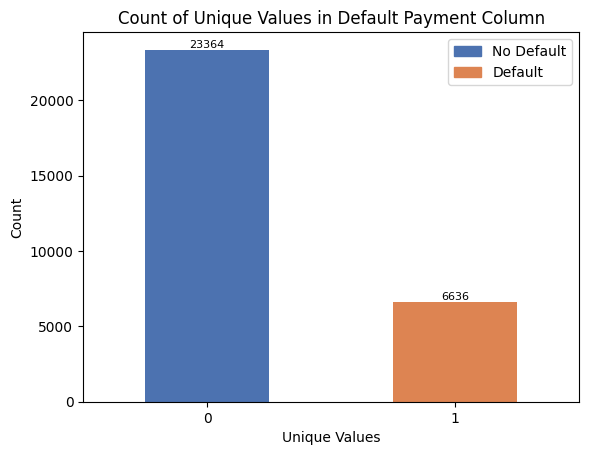

In [36]:
value_counts = df['default.payment.next.month'].value_counts().sort_index()
num_colors = len(value_counts)
colors = sns.color_palette('deep')
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Default',
    1: 'Default',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Default Payment Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

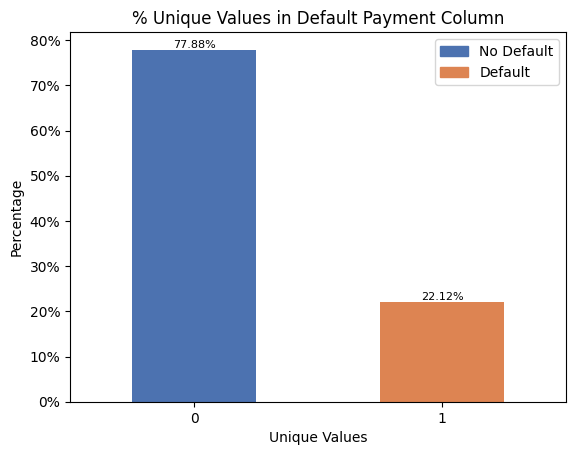

In [37]:

value_counts = round(df['default.payment.next.month'].value_counts(normalize=True).sort_index()*100,2)
num_colors = len(value_counts)
colors = sns.color_palette('deep')
for i, count in enumerate(value_counts):
    plt.text(i, count, f"{count}%", ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Default',
    1: 'Default',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('% Unique Values in Default Payment Column')
plt.xlabel('Unique Values')
plt.ylabel('Percentage')  # Label for the y-axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  # Format y-axis with % symbol
plt.xticks(rotation=0)
plt.show()

It is clear that we have an imbalaced data set, since we have more records for No Default, than for Default. This will make us later on apply some techniques to under sample the data and balance it for our ML algorithms

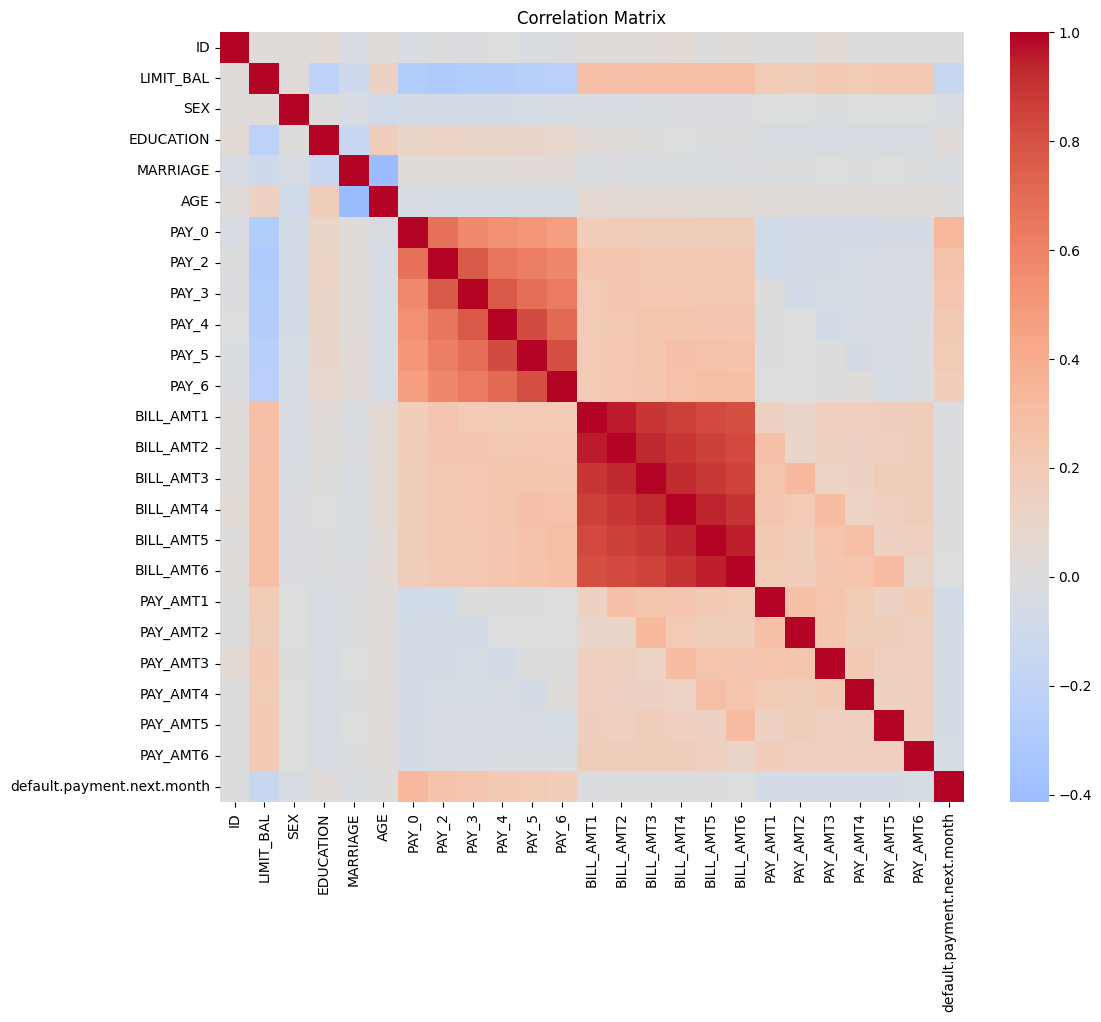

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Data Analysis and Cleaning

First we will remove the ID column since it does not add any information and will lead the ML algorithm to a mistake

In [39]:
df.drop(columns=['ID'], inplace=True)

### Categorical Variables

#### Gender

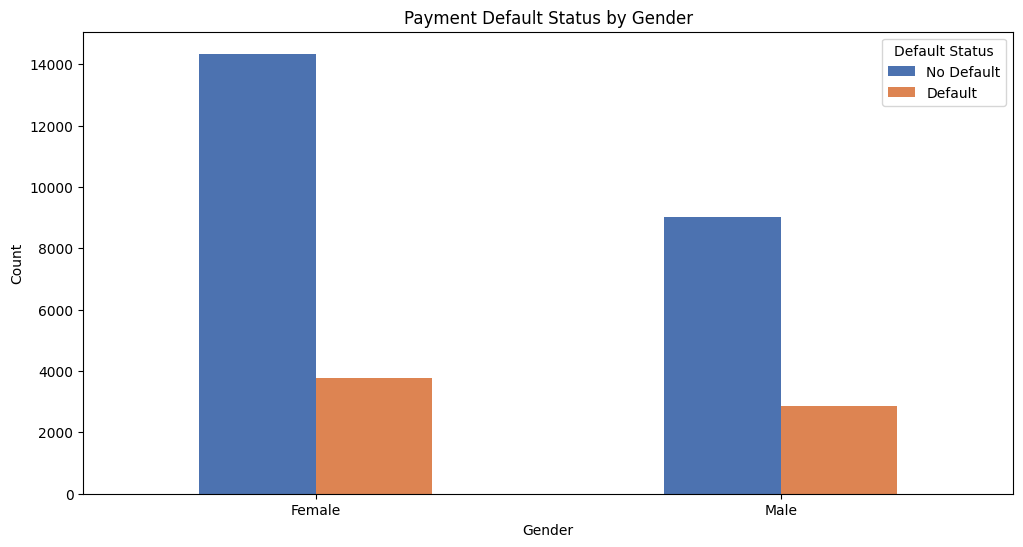

In [56]:
grouped_data = df.groupby(['SEX', 'default.payment.next.month']).size().unstack()
grouped_data.index = grouped_data.index.map({1: 'Male', 2: 'Female'})
colors = sns.color_palette('deep')
grouped_data = grouped_data.sort_values(by=[0, 1], ascending=False)
grouped_data.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Payment Default Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Default', 'Default'], title='Default Status', loc='upper right')
plt.show()

### Education

We decided to remove the EDUCATION rows that contained a value of 0 since it was not defined in the metadata. At the same time we have combine unknown categories with others to reduce the number of categories

In [58]:
df = df[df['EDUCATION'] != 0]
df['EDUCATION'] = df['EDUCATION'].replace({5: 4, 6: 4})

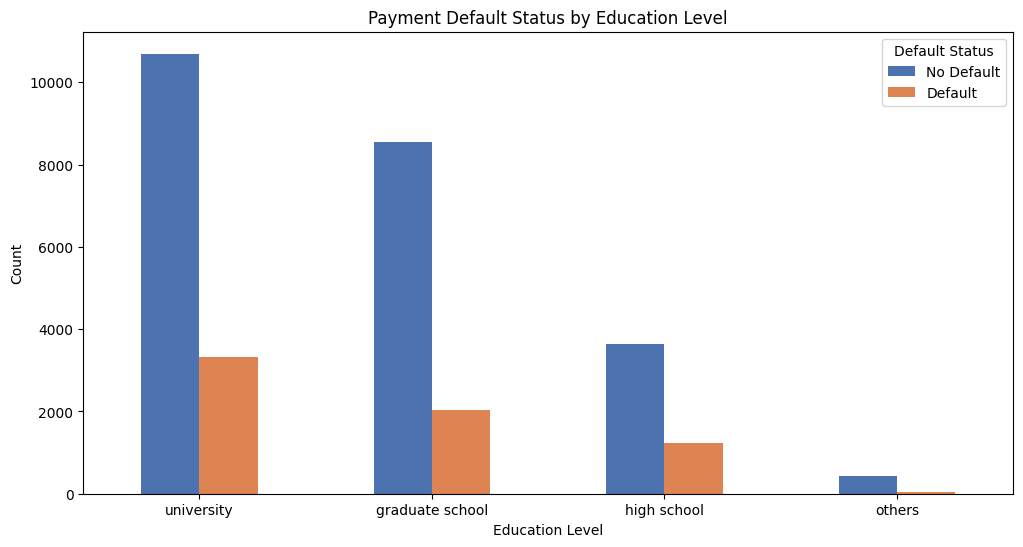

In [62]:
grouped_data = df.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack()
grouped_data.index = grouped_data.index.map({1:'graduate school', 2:'university', 3:'high school', 4:'others'})
colors = sns.color_palette('deep')
grouped_data = grouped_data.sort_values(by=[0, 1], ascending=False)
grouped_data.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Payment Default Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Default', 'Default'], title='Default Status', loc='upper right')
plt.show()

### Marriage

In [61]:
df= df[df['MARRIAGE'] != 0]

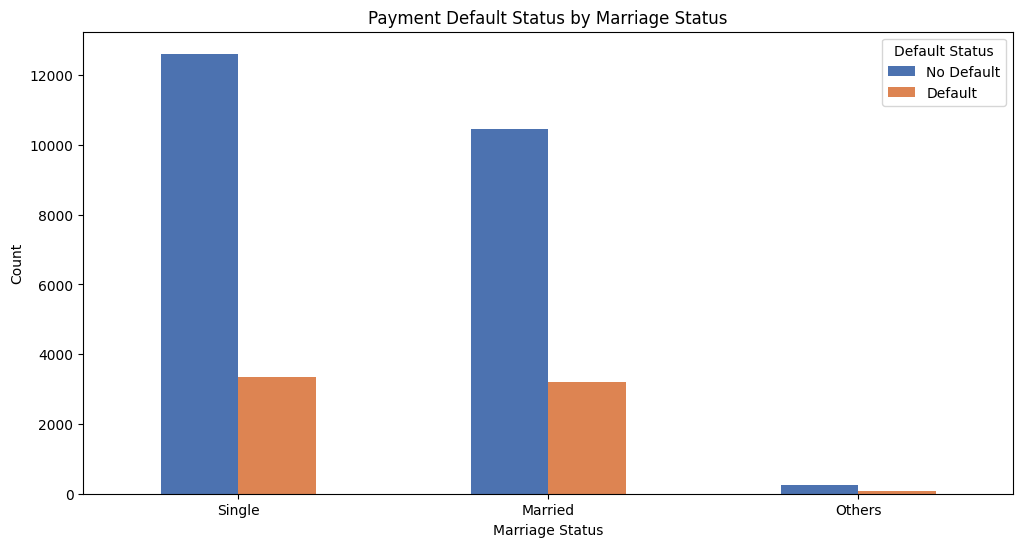

In [64]:
grouped_data = df.groupby(['MARRIAGE', 'default.payment.next.month']).size().unstack()
grouped_data.index = grouped_data.index.map({1:'Married', 2:'Single', 3:'Others'})
colors = sns.color_palette('deep')
grouped_data = grouped_data.sort_values(by=[0, 1], ascending=False)
grouped_data.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Payment Default Status by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Default', 'Default'], title='Default Status', loc='upper right')
plt.show()

### Repayment Status

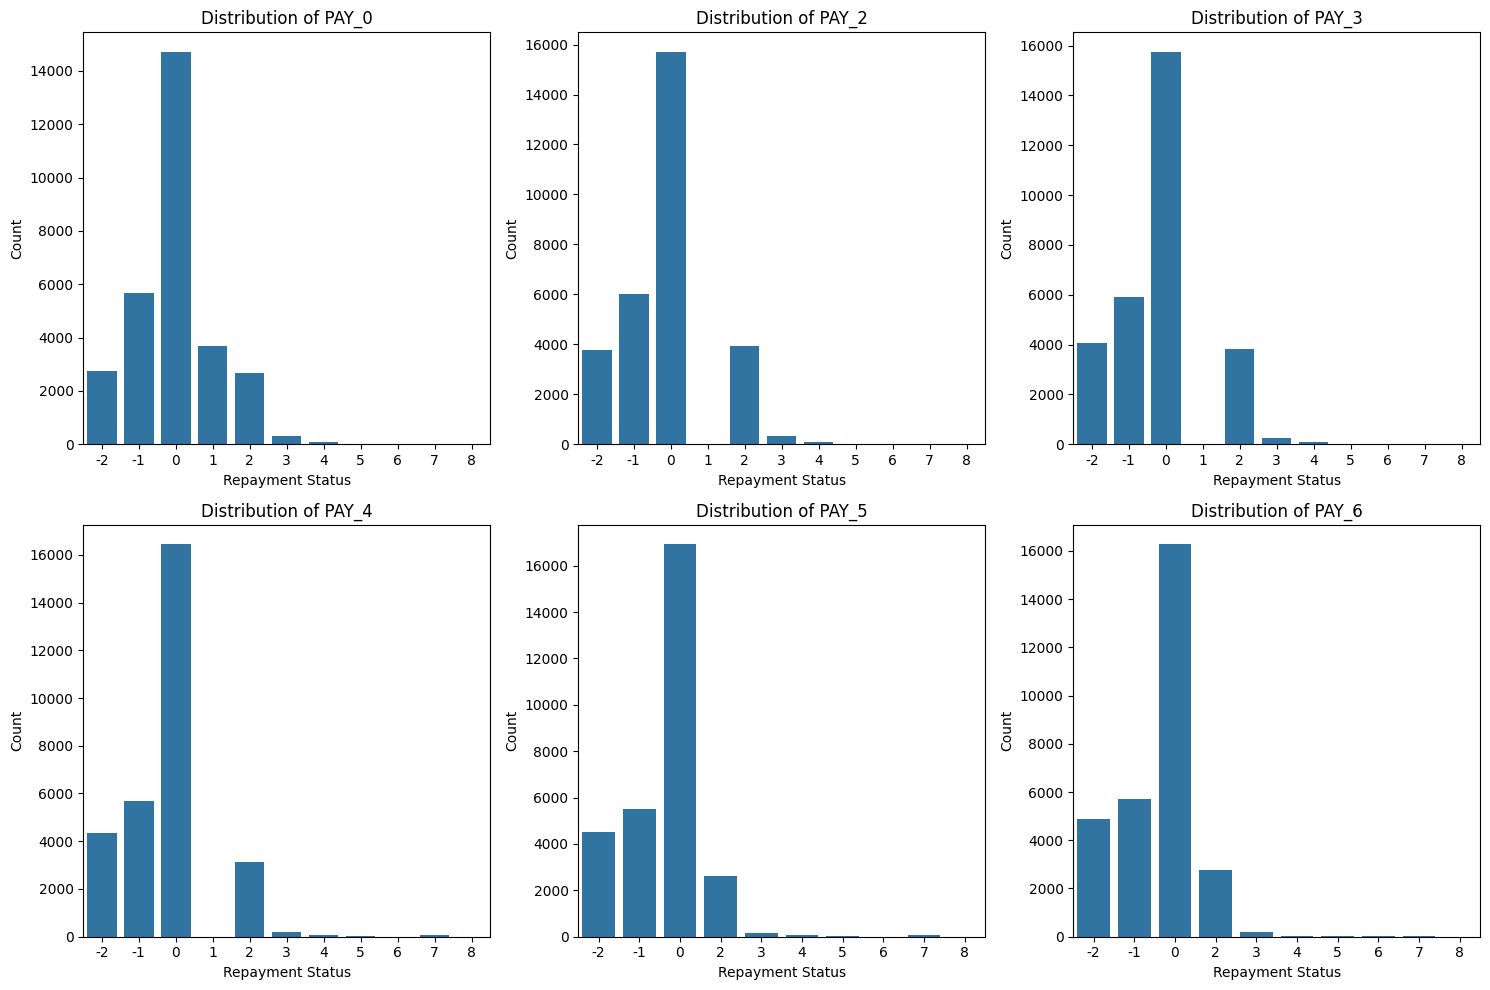

In [68]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15, 10))
for i, col in enumerate(pay_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Repayment Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


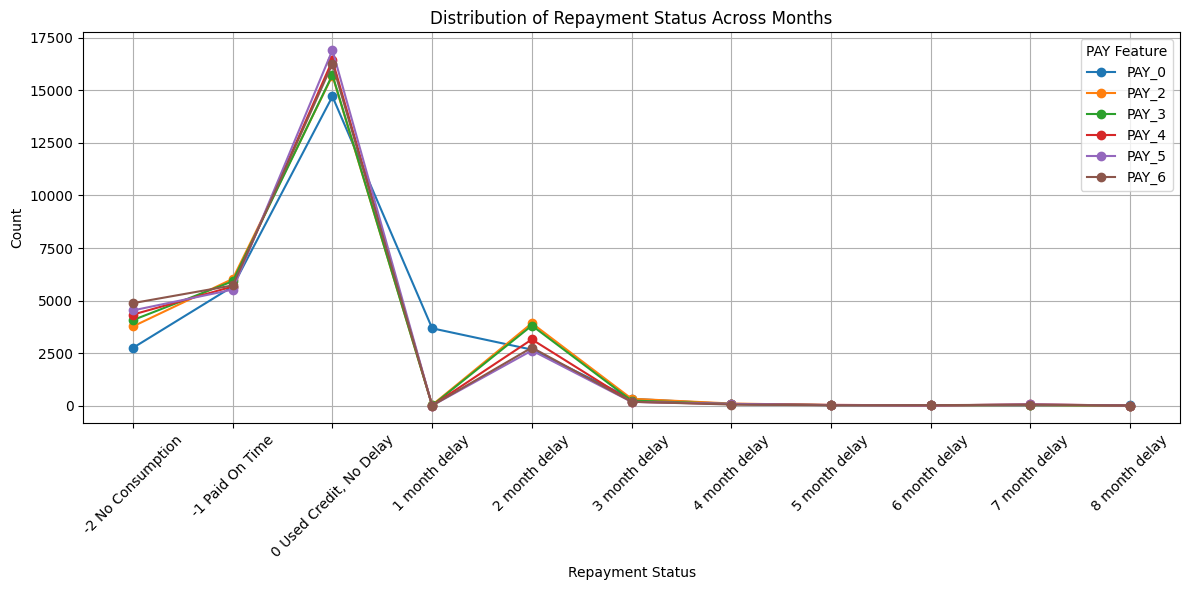

In [74]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_status_range = sorted(set(df[pay_cols].values.ravel()))

status_labels = {
    -2: '-2 No Consumption',
    -1: '-1 Paid On Time',
     0: '0 Used Credit, No Delay',
     1: '1 month delay',
     2: '2 month delay',
     3: '3 month delay',
     4: '4 month delay',
     5: '5 month delay',
     6: '6 month delay',
     7: '7 month delay',
     8: '8 month delay',
     9: '9+ month delay'
}

plt.figure(figsize=(12, 6))
for col in pay_cols:
    counts = df[col].value_counts().reindex(pay_status_range, fill_value=0)
    plt.plot(pay_status_range, counts, marker='o', label=col)

plt.title('Distribution of Repayment Status Across Months')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='PAY Feature')
plt.grid(True)

plt.xticks(ticks=pay_status_range, labels=[status_labels.get(x, str(x)) for x in pay_status_range], rotation=45)
plt.tight_layout()
plt.show()

### Numerical Variables

c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


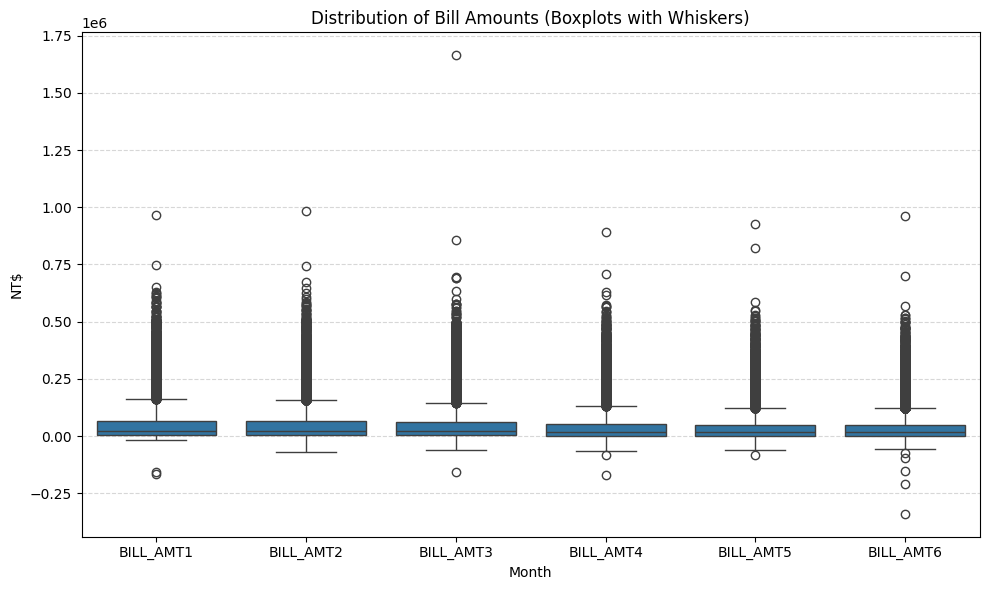

In [92]:
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
df_long = df[bill_cols].melt(var_name='Month', value_name='Bill Amount')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Bill Amount', data=df_long)

plt.title('Distribution of Bill Amounts (Boxplots with Whiskers)')
plt.ylabel('NT$')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Surface\AppData\Local\Temp\ipykernel_22420\3067993563.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Log Bill Amount', data=df_long, palette='Blues')
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-li

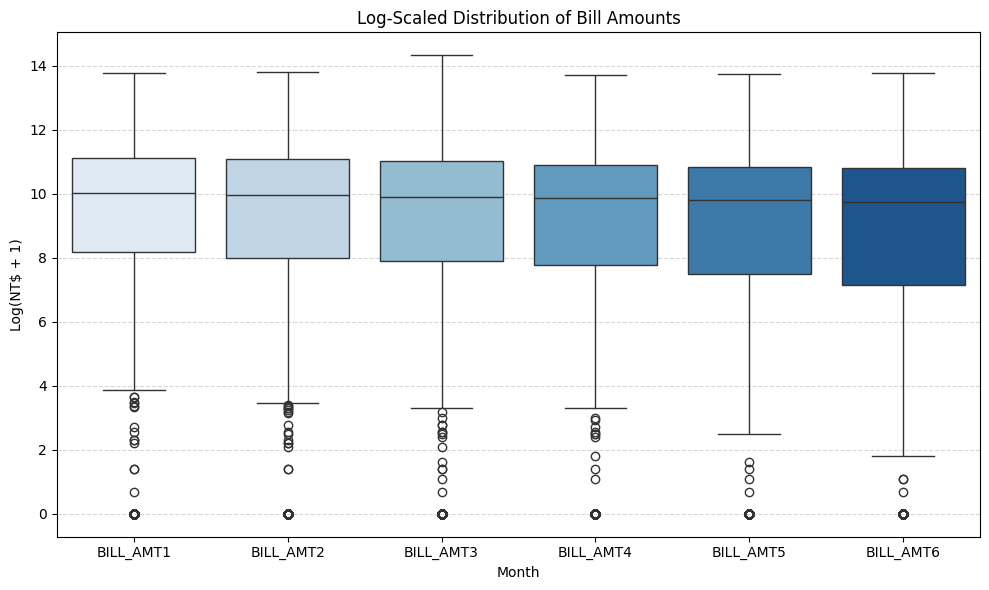

In [100]:
import numpy as np

# Prepare the long-form dataframe
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
df_long = df[bill_cols].melt(var_name='Month', value_name='Bill Amount')

# Add log-transformed values (offset to avoid log(0) or log(negative))
df_long['Log Bill Amount'] = np.log1p(df_long['Bill Amount'].clip(lower=0))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Log Bill Amount', data=df_long, palette='Blues')
plt.title('Log-Scaled Distribution of Bill Amounts')
plt.ylabel('Log(NT$ + 1)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


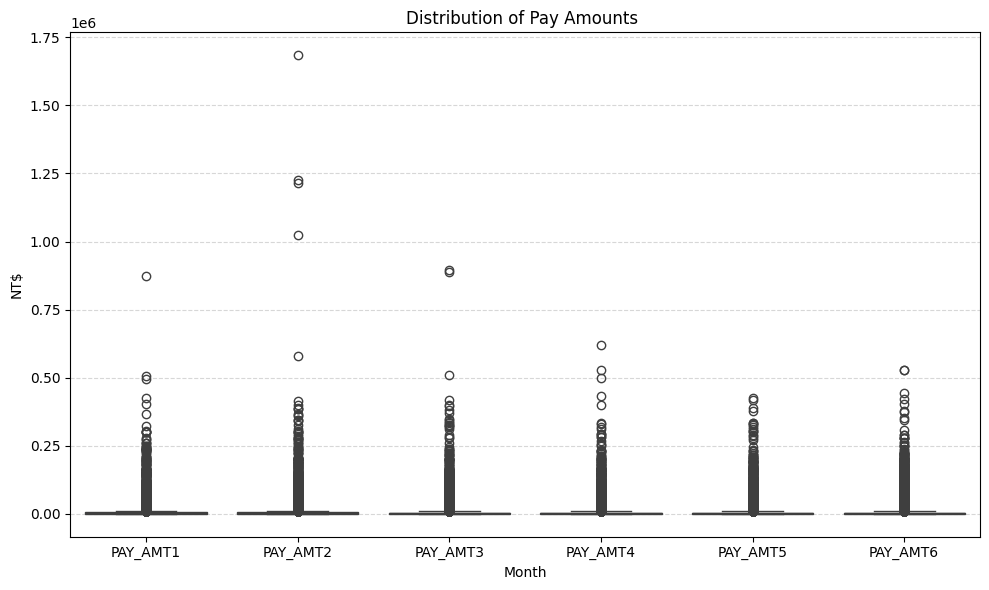

In [97]:
pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
df_long = df[pay_cols].melt(var_name='Month', value_name='Pay Amount')


plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Pay Amount', data=df_long)

plt.title('Distribution of Pay Amounts ')
plt.ylabel('NT$')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Surface\AppData\Local\Temp\ipykernel_22420\308471223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Log Pay Amount', data=df_long, palette='Set2')
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, 

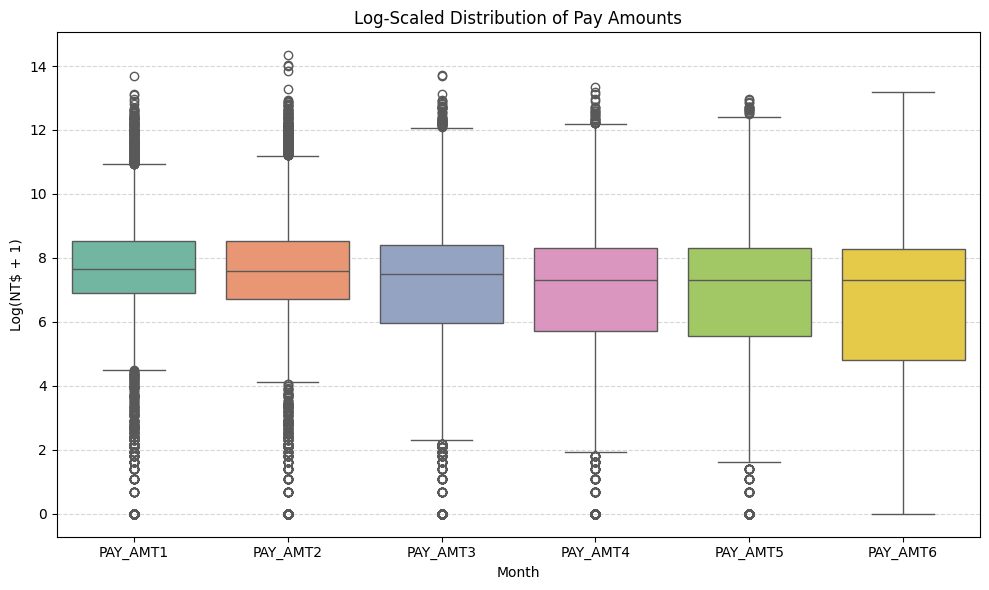

In [ ]:
df_long['Log Pay Amount'] = np.log1p(df_long['Pay Amount'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Log Pay Amount', data=df_long, palette='Set2')
plt.title('Log-Scaled Distribution of Pay Amounts')
plt.ylabel('Log(NT$ + 1)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


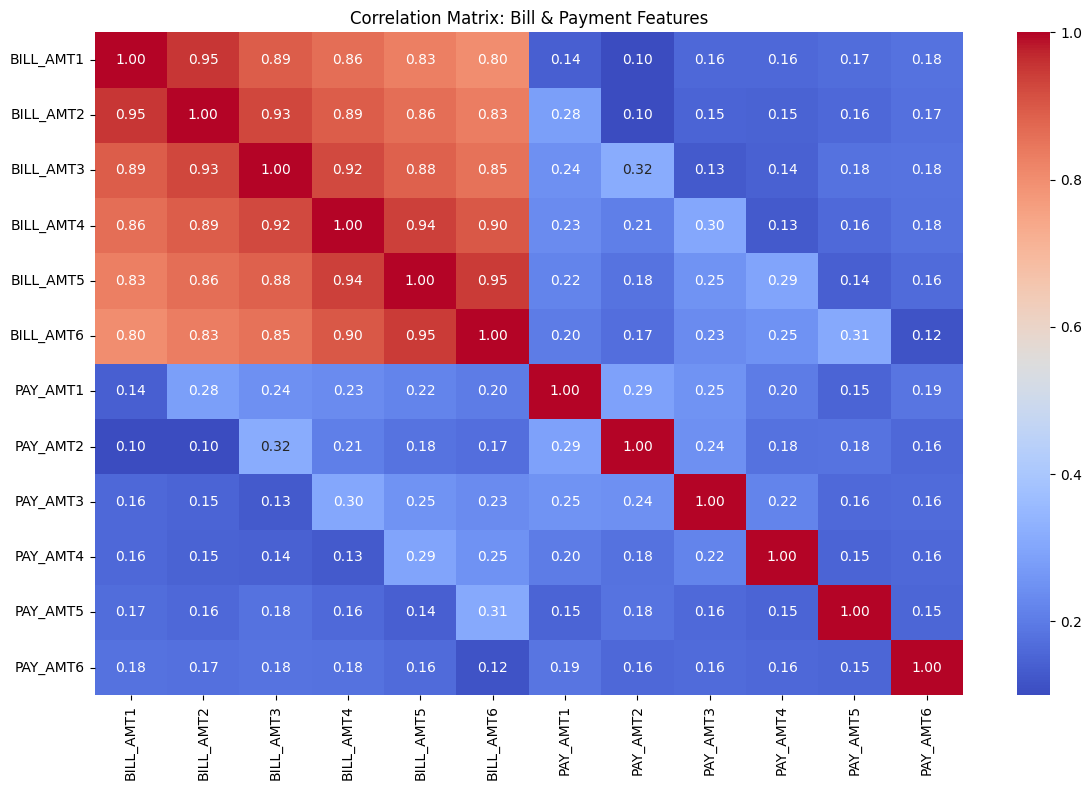

In [ ]:
import numpy as np

plt.figure(figsize=(12, 8))
sns.heatmap(df[bill_cols + pay_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm' )
plt.title('Correlation Matrix: Bill & Payment Features')
plt.tight_layout()
plt.show()